In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [3]:
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT295Chip3_BF_20230822\S21\Power/'
df = S21.loop_over_S21_files(dir, kid=None, pread=110)
display(df)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIP

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr
0,100,-110.0,0.049985,4.544834,1.530950e-07,31906.578170,60.658037,36397.717974,74.433029,258581.715193,3563.082655,-70.504636,0.000064
1,101,-110.0,0.050010,4.547765,2.901247e-07,19089.888183,36.907191,21196.554703,43.595750,192075.895888,3044.864571,-72.618084,0.000077
2,102,-110.0,0.050011,4.549816,3.444546e-07,23577.313931,69.811296,26821.707871,82.827656,194915.857452,3902.975947,-71.806476,0.000164
3,103,-110.0,0.050000,4.560093,2.229066e-07,18969.895378,27.921145,21269.830774,32.485423,175433.825307,1863.800478,-72.687840,0.000044
4,104,-110.0,0.050008,4.566046,1.513073e-07,27650.074052,43.283054,30756.991945,52.716090,273722.426615,3848.642563,-71.017011,0.000045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,96,-110.0,0.049996,4.525289,2.003327e-07,16236.376929,18.205136,17331.091324,23.959181,257047.986780,4532.970859,-73.149975,0.000038
376,97,-110.0,0.049974,4.531039,2.606705e-07,32938.900001,112.090150,41736.548835,136.241466,156264.023985,1924.587998,-70.822482,0.000168
377,98,-110.0,0.050006,4.540587,5.988513e-07,31466.445673,231.203609,35183.847808,290.158060,297818.367636,19609.069271,-70.477978,0.000863
378,99,-110.0,0.050010,4.541224,2.676348e-07,24695.199696,61.741411,28167.042714,74.378005,200352.015066,3422.824035,-71.616660,0.000141


In [4]:
def fit(x, a, b):
    return a*x**(-2)+b 

230
-309472.87609679124 41916.165657741476


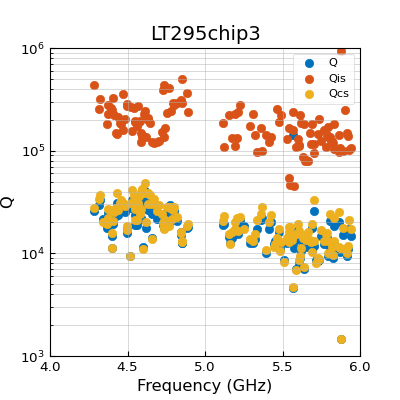

In [9]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])

min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('LT295chip3')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
# ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,6)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e3, 1e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

Text(0, 0.5, 'Length coupler (um)')

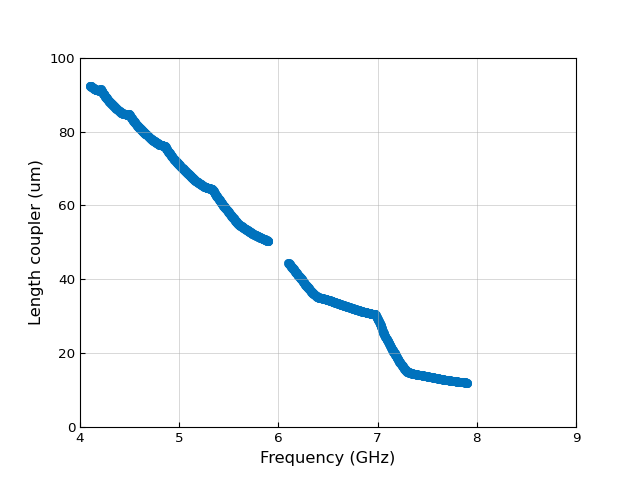

In [56]:
couplers = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_couplers.npy')
f0s_design = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_F0s.npy')*1e-9
fig, ax = plt.subplots()
ax.scatter(f0s_design, couplers)
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, 100)
ax.set_ylabel('Length coupler (um)')